In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
iphone_df = pd.read_csv('iphone_purchase_records.csv')

In [5]:
iphone_df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
iphone_df['Purchase Iphone'].value_counts()

0    257
1    143
Name: Purchase Iphone, dtype: int64

In [8]:
iphone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [9]:
iphone_df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


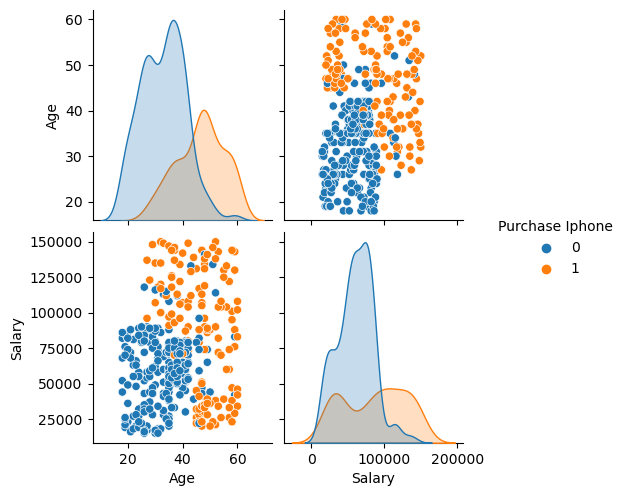

In [10]:
# Now find the relationships between the columns using the  graph

sns.pairplot(iphone_df,hue='Purchase Iphone')
plt.show()

## As we can see there is no linearly distibuted data and also data has skewed data distribution then first we need to standarized the data for better/optimatal output

### Standardization of data 

In [15]:
# Convert the Gender categorical column into numerical column

iphone_df.replace({'Male':1,"Female":0},inplace=True)


In [17]:
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
X_stand=stand.fit_transform(iphone_df.iloc[:,:-1])
print(X_stand)

[[ 1.02020406 -1.78179743 -1.49004624]
 [ 1.02020406 -0.25358736 -1.46068138]
 [-0.98019606 -1.11320552 -0.78528968]
 ...
 [-0.98019606  1.17910958 -1.46068138]
 [ 1.02020406 -0.15807423 -1.07893824]
 [-0.98019606  1.08359645 -0.99084367]]


In [18]:
# Now split the data into X and y

X = X_stand
y =  iphone_df.iloc[:,-1]

In [19]:
print(X.shape)

(400, 3)


In [20]:
print(y.shape)

(400,)


## Now Split the data into training and testing set

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(320, 3)
(320,)
(80, 3)
(80,)


## Model Training

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [31]:
y_pred = knn_model.predict(X_test)

In [32]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[55,  3],
       [ 1, 21]], dtype=int64)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



In [37]:
# Determing the value of K using elbow mwthod

Error_rate= []  # blank list 

for i in range(1,41):
    KNN_model2=KNeighborsClassifier(n_neighbors=i)
    KNN_model2.fit(X_train,y_train)
    new_prediction=KNN_model2.predict(X_test)
    
    Error_rate.append(np.mean(new_prediction != y_test)) 

In [38]:
Error_rate 

[0.075,
 0.075,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.075,
 0.0625,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.0875,
 0.0875,
 0.0875,
 0.0875,
 0.1,
 0.0875,
 0.1,
 0.1,
 0.075]

In [39]:
len(Error_rate)  

40

Text(0.5, 1.0, 'Error Rate')

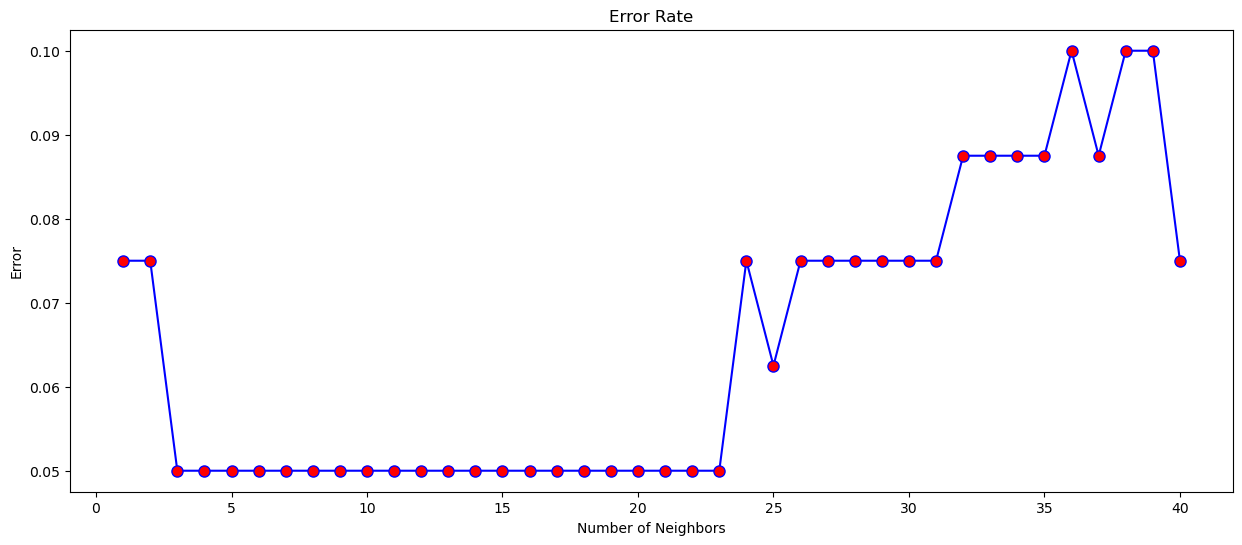

In [40]:
# Plotting the graph for error rate and K value

plt.figure(figsize=(15,6))
plt.plot(range(1,41),Error_rate,color='blue',marker='o',markerfacecolor='red',markersize=8)
plt.xlabel("Number of Neighbors")
plt.ylabel("Error")
plt.title("Error Rate")


In [48]:
# as we can see in above graph, at 3 to 23 number_of_neighbors we have smallest error

# and we have already checked the accuracy on the K-value =3 which is 


